In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
np.random.seed(777)
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import DenseNet201
from keras.applications import DenseNet121

from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [5]:
train_dir = 'data/iciar/train/'
test_dir = "data/iciar/test/"

extracted_features_dir = "extracted_features/"
model_name = "iciar_ResNet50"

In [6]:
import keras
import tensorflow as tf
import keras.backend as K

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.2.4
tensorflow Version 1.10.0
dim_ordering: tf


In [7]:
batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 1000

In [8]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

data/iciar/train/ 0
data/iciar/train/carcinoma 2310
data/iciar/train/non-carcinoma 2310
******************************
data/iciar/test/ 0
data/iciar/test/carcinoma 50
data/iciar/test/non-carcinoma 50


In [9]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.25,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'training',
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'validation',
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3466 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [10]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))

# nb_test_without_aug_samples = len(test_generator_without_aug.filenames)
# predict_size_test_without_aug = int(math.ceil(nb_test_without_aug_samples / batch_size))

num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_validation)
# print("nb_test_without_aug_samples:", nb_test_without_aug_samples)
# print("predict_size_test_without_aug_samples:", predict_size_test_without_aug)
print("nb_test_samples:", nb_test_samples)
print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 3466
nb_validation_samples: 1154

predict_size_train: 109
predict_size_validation: 37
nb_test_samples: 100
predict_size_test: 4

 num_classes: 2


In [11]:
# from keras.backend.tensorflow_backend import get_session
# from keras.backend.tensorflow_backend import clear_session
# from keras.backend.tensorflow_backend import set_session

# def reset_keras_tf_session():
#     """
#     this function clears the gpu memory and set the 
#     tf session to not use the whole gpu
#     """
#     sess = get_session()
#     clear_session()
#     sess.close()
#     sess = get_session()

# #     config = tf.ConfigProto()
# #     config.gpu_options.allow_growth = True
# #     set_session(tf.Session(config=config))


# reset_keras_tf_session()

In [12]:
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.densenet import DenseNet169
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception, preprocess_input

input_tensor = Input(shape = input_shape)  
model = ResNet50(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)
bottleneck_final_model = model

In [13]:
# for i, layer in enumerate(model.layers):
#     print(i, layer.name)

In [14]:
# c1 = model.layers[9].output 
# c1 = GlobalAveragePooling2D()(c1)       

# c2 = model.layers[55].output
# c2 = GlobalAveragePooling2D()(c2)       

# c3 = model.layers[143].output
# c3 = GlobalAveragePooling2D()(c3)       

# c4 = model.layers[483].output
# c4 = GlobalAveragePooling2D()(c4)

# con = concatenate([c1, c2, c3, c4])

# bottleneck_final_model = Model(inputs=model.input, outputs=con)

In [15]:
# bottleneck_final_model.summary()

In [16]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [17]:
bottleneck_features_validation = bottleneck_final_model.predict_generator(validation_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [18]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [19]:
dropout_rate = 0.4

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name+'.txt','w') as f:
    f.write(str(history.history))

# model.save_weights(top_model_weights_path)
# model.save(top_model_path)

Train on 3466 samples, validate on 1154 samples
Epoch 1/1000
 - 1s - loss: 0.7629 - acc: 0.4997 - val_loss: 0.6871 - val_acc: 0.5173
Epoch 2/1000
 - 0s - loss: 0.7202 - acc: 0.5124 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 3/1000
 - 0s - loss: 0.6935 - acc: 0.5404 - val_loss: 0.6824 - val_acc: 0.5433
Epoch 4/1000
 - 0s - loss: 0.6822 - acc: 0.5563 - val_loss: 0.6667 - val_acc: 0.6291
Epoch 5/1000
 - 0s - loss: 0.6750 - acc: 0.5733 - val_loss: 0.6674 - val_acc: 0.5953
Epoch 6/1000
 - 0s - loss: 0.6673 - acc: 0.5880 - val_loss: 0.6567 - val_acc: 0.6248
Epoch 7/1000
 - 0s - loss: 0.6652 - acc: 0.5906 - val_loss: 0.6536 - val_acc: 0.6265
Epoch 8/1000
 - 0s - loss: 0.6584 - acc: 0.6108 - val_loss: 0.6488 - val_acc: 0.6499
Epoch 9/1000
 - 0s - loss: 0.6578 - acc: 0.6065 - val_loss: 0.6451 - val_acc: 0.6404
Epoch 10/1000
 - 0s - loss: 0.6525 - acc: 0.6241 - val_loss: 0.6409 - val_acc: 0.6568
Epoch 11/1000
 - 0s - loss: 0.6494 - acc: 0.6229 - val_loss: 0.6379 - val_acc: 0.6733
Epoch 12/1000
 

Epoch 96/1000
 - 0s - loss: 0.5312 - acc: 0.7441 - val_loss: 0.6259 - val_acc: 0.6612
Epoch 97/1000
 - 0s - loss: 0.5299 - acc: 0.7320 - val_loss: 0.5233 - val_acc: 0.7452
Epoch 98/1000
 - 0s - loss: 0.5231 - acc: 0.7452 - val_loss: 0.5196 - val_acc: 0.7366
Epoch 99/1000
 - 0s - loss: 0.5242 - acc: 0.7412 - val_loss: 0.5370 - val_acc: 0.7132
Epoch 100/1000
 - 0s - loss: 0.5225 - acc: 0.7522 - val_loss: 0.5285 - val_acc: 0.7400
Epoch 101/1000
 - 0s - loss: 0.5225 - acc: 0.7464 - val_loss: 0.5239 - val_acc: 0.7383
Epoch 102/1000
 - 0s - loss: 0.5255 - acc: 0.7398 - val_loss: 0.5383 - val_acc: 0.7158
Epoch 103/1000
 - 0s - loss: 0.5238 - acc: 0.7409 - val_loss: 0.5251 - val_acc: 0.7270
Epoch 104/1000
 - 0s - loss: 0.5221 - acc: 0.7400 - val_loss: 0.5279 - val_acc: 0.7322
Epoch 105/1000
 - 0s - loss: 0.5196 - acc: 0.7530 - val_loss: 0.5311 - val_acc: 0.7279
Epoch 106/1000
 - 0s - loss: 0.5196 - acc: 0.7470 - val_loss: 0.5145 - val_acc: 0.7444
Epoch 107/1000
 - 0s - loss: 0.5178 - acc: 0.75

Epoch 191/1000
 - 0s - loss: 0.4849 - acc: 0.7744 - val_loss: 0.4941 - val_acc: 0.7556
Epoch 192/1000
 - 0s - loss: 0.4794 - acc: 0.7738 - val_loss: 0.4807 - val_acc: 0.7652
Epoch 193/1000
 - 0s - loss: 0.4782 - acc: 0.7773 - val_loss: 0.5067 - val_acc: 0.7539
Epoch 194/1000
 - 0s - loss: 0.4797 - acc: 0.7767 - val_loss: 0.5010 - val_acc: 0.7539
Epoch 195/1000
 - 0s - loss: 0.4764 - acc: 0.7784 - val_loss: 0.4870 - val_acc: 0.7565
Epoch 196/1000
 - 0s - loss: 0.4757 - acc: 0.7718 - val_loss: 0.4949 - val_acc: 0.7669
Epoch 197/1000
 - 0s - loss: 0.4763 - acc: 0.7830 - val_loss: 0.4814 - val_acc: 0.7704
Epoch 198/1000
 - 0s - loss: 0.4763 - acc: 0.7830 - val_loss: 0.4824 - val_acc: 0.7704
Epoch 199/1000
 - 0s - loss: 0.4792 - acc: 0.7810 - val_loss: 0.4865 - val_acc: 0.7556
Epoch 200/1000
 - 0s - loss: 0.4841 - acc: 0.7750 - val_loss: 0.4819 - val_acc: 0.7530
Epoch 201/1000
 - 0s - loss: 0.4759 - acc: 0.7773 - val_loss: 0.4876 - val_acc: 0.7660
Epoch 202/1000
 - 0s - loss: 0.4735 - acc: 

 - 0s - loss: 0.4426 - acc: 0.7943 - val_loss: 0.4603 - val_acc: 0.7842
Epoch 286/1000
 - 0s - loss: 0.4462 - acc: 0.7946 - val_loss: 0.4713 - val_acc: 0.7782
Epoch 287/1000
 - 0s - loss: 0.4425 - acc: 0.7969 - val_loss: 0.4649 - val_acc: 0.7730
Epoch 288/1000
 - 0s - loss: 0.4375 - acc: 0.7986 - val_loss: 0.5046 - val_acc: 0.7600
Epoch 289/1000
 - 0s - loss: 0.4412 - acc: 0.7960 - val_loss: 0.4543 - val_acc: 0.7903
Epoch 290/1000
 - 0s - loss: 0.4429 - acc: 0.7960 - val_loss: 0.4658 - val_acc: 0.7704
Epoch 291/1000
 - 0s - loss: 0.4401 - acc: 0.8073 - val_loss: 0.4555 - val_acc: 0.7834
Epoch 292/1000
 - 0s - loss: 0.4471 - acc: 0.7966 - val_loss: 0.5508 - val_acc: 0.7149
Epoch 293/1000
 - 0s - loss: 0.4397 - acc: 0.8081 - val_loss: 0.4547 - val_acc: 0.7903
Epoch 294/1000
 - 0s - loss: 0.4373 - acc: 0.8055 - val_loss: 0.4541 - val_acc: 0.7903
Epoch 295/1000
 - 0s - loss: 0.4403 - acc: 0.8012 - val_loss: 0.5163 - val_acc: 0.7409
Epoch 296/1000
 - 0s - loss: 0.4395 - acc: 0.8003 - val_lo

Epoch 380/1000
 - 0s - loss: 0.4041 - acc: 0.8231 - val_loss: 0.4605 - val_acc: 0.7955
Epoch 381/1000
 - 0s - loss: 0.4127 - acc: 0.8119 - val_loss: 0.5483 - val_acc: 0.7218
Epoch 382/1000
 - 0s - loss: 0.4122 - acc: 0.8168 - val_loss: 0.4383 - val_acc: 0.7903
Epoch 383/1000
 - 0s - loss: 0.4089 - acc: 0.8165 - val_loss: 0.4468 - val_acc: 0.7886
Epoch 384/1000
 - 0s - loss: 0.4032 - acc: 0.8205 - val_loss: 0.4528 - val_acc: 0.7868
Epoch 385/1000
 - 0s - loss: 0.4124 - acc: 0.8148 - val_loss: 0.4356 - val_acc: 0.8050
Epoch 386/1000
 - 0s - loss: 0.4108 - acc: 0.8093 - val_loss: 0.4542 - val_acc: 0.7886
Epoch 387/1000
 - 0s - loss: 0.4084 - acc: 0.8246 - val_loss: 0.4736 - val_acc: 0.7868
Epoch 388/1000
 - 0s - loss: 0.4027 - acc: 0.8217 - val_loss: 0.4344 - val_acc: 0.7946
Epoch 389/1000
 - 0s - loss: 0.4072 - acc: 0.8249 - val_loss: 0.4463 - val_acc: 0.7825
Epoch 390/1000
 - 0s - loss: 0.4079 - acc: 0.8148 - val_loss: 0.4363 - val_acc: 0.8007
Epoch 391/1000
 - 0s - loss: 0.4130 - acc: 

 - 0s - loss: 0.3763 - acc: 0.8355 - val_loss: 0.4546 - val_acc: 0.7877
Epoch 475/1000
 - 0s - loss: 0.3797 - acc: 0.8312 - val_loss: 0.4309 - val_acc: 0.8050
Epoch 476/1000
 - 0s - loss: 0.3818 - acc: 0.8347 - val_loss: 0.4297 - val_acc: 0.7981
Epoch 477/1000
 - 0s - loss: 0.3726 - acc: 0.8367 - val_loss: 0.4217 - val_acc: 0.8016
Epoch 478/1000
 - 0s - loss: 0.3719 - acc: 0.8318 - val_loss: 0.4462 - val_acc: 0.8050
Epoch 479/1000
 - 0s - loss: 0.3756 - acc: 0.8442 - val_loss: 0.6009 - val_acc: 0.6984
Epoch 480/1000
 - 0s - loss: 0.3768 - acc: 0.8335 - val_loss: 0.4167 - val_acc: 0.8085
Epoch 481/1000
 - 0s - loss: 0.3792 - acc: 0.8350 - val_loss: 0.4280 - val_acc: 0.8024
Epoch 482/1000
 - 0s - loss: 0.3835 - acc: 0.8309 - val_loss: 0.4306 - val_acc: 0.7981
Epoch 483/1000
 - 0s - loss: 0.3719 - acc: 0.8361 - val_loss: 0.4853 - val_acc: 0.7816
Epoch 484/1000
 - 0s - loss: 0.3815 - acc: 0.8413 - val_loss: 0.4268 - val_acc: 0.7998
Epoch 485/1000
 - 0s - loss: 0.3776 - acc: 0.8358 - val_lo

Epoch 569/1000
 - 0s - loss: 0.3528 - acc: 0.8456 - val_loss: 0.4706 - val_acc: 0.7825
Epoch 570/1000
 - 0s - loss: 0.3562 - acc: 0.8456 - val_loss: 0.3993 - val_acc: 0.8224
Epoch 571/1000
 - 0s - loss: 0.3541 - acc: 0.8474 - val_loss: 0.3978 - val_acc: 0.8120
Epoch 572/1000
 - 0s - loss: 0.3548 - acc: 0.8456 - val_loss: 0.4003 - val_acc: 0.8215
Epoch 573/1000
 - 0s - loss: 0.3459 - acc: 0.8517 - val_loss: 0.4072 - val_acc: 0.8232
Epoch 574/1000
 - 0s - loss: 0.3544 - acc: 0.8500 - val_loss: 0.4010 - val_acc: 0.8163
Epoch 575/1000
 - 0s - loss: 0.3499 - acc: 0.8491 - val_loss: 0.4186 - val_acc: 0.8059
Epoch 576/1000
 - 0s - loss: 0.3460 - acc: 0.8523 - val_loss: 0.3984 - val_acc: 0.8180
Epoch 577/1000
 - 0s - loss: 0.3451 - acc: 0.8531 - val_loss: 0.4070 - val_acc: 0.8102
Epoch 578/1000
 - 0s - loss: 0.3554 - acc: 0.8482 - val_loss: 0.3990 - val_acc: 0.8206
Epoch 579/1000
 - 0s - loss: 0.3441 - acc: 0.8514 - val_loss: 0.3996 - val_acc: 0.8111
Epoch 580/1000
 - 0s - loss: 0.3500 - acc: 

 - 0s - loss: 0.3269 - acc: 0.8612 - val_loss: 0.3951 - val_acc: 0.8258
Epoch 664/1000
 - 0s - loss: 0.3251 - acc: 0.8586 - val_loss: 0.3959 - val_acc: 0.8163
Epoch 665/1000
 - 0s - loss: 0.3253 - acc: 0.8615 - val_loss: 0.4021 - val_acc: 0.8180
Epoch 666/1000
 - 0s - loss: 0.3230 - acc: 0.8589 - val_loss: 0.3860 - val_acc: 0.8206
Epoch 667/1000
 - 0s - loss: 0.3319 - acc: 0.8566 - val_loss: 0.3867 - val_acc: 0.8232
Epoch 668/1000
 - 0s - loss: 0.3228 - acc: 0.8650 - val_loss: 0.4993 - val_acc: 0.7738
Epoch 669/1000
 - 0s - loss: 0.3184 - acc: 0.8604 - val_loss: 0.4284 - val_acc: 0.8042
Epoch 670/1000
 - 0s - loss: 0.3326 - acc: 0.8557 - val_loss: 0.4533 - val_acc: 0.7851
Epoch 671/1000
 - 0s - loss: 0.3248 - acc: 0.8632 - val_loss: 0.4293 - val_acc: 0.8085
Epoch 672/1000
 - 0s - loss: 0.3272 - acc: 0.8580 - val_loss: 0.3843 - val_acc: 0.8310
Epoch 673/1000
 - 0s - loss: 0.3266 - acc: 0.8615 - val_loss: 0.3995 - val_acc: 0.8206
Epoch 674/1000
 - 0s - loss: 0.3219 - acc: 0.8624 - val_lo

Epoch 758/1000
 - 0s - loss: 0.3036 - acc: 0.8728 - val_loss: 0.3754 - val_acc: 0.8319
Epoch 759/1000
 - 0s - loss: 0.2989 - acc: 0.8676 - val_loss: 0.4107 - val_acc: 0.8206
Epoch 760/1000
 - 0s - loss: 0.3012 - acc: 0.8745 - val_loss: 0.4233 - val_acc: 0.8076
Epoch 761/1000
 - 0s - loss: 0.3018 - acc: 0.8705 - val_loss: 0.4508 - val_acc: 0.7998
Epoch 762/1000
 - 0s - loss: 0.2952 - acc: 0.8710 - val_loss: 0.4476 - val_acc: 0.7998
Epoch 763/1000
 - 0s - loss: 0.3011 - acc: 0.8774 - val_loss: 0.3805 - val_acc: 0.8284
Epoch 764/1000
 - 0s - loss: 0.3065 - acc: 0.8696 - val_loss: 0.3827 - val_acc: 0.8371
Epoch 765/1000
 - 0s - loss: 0.3012 - acc: 0.8736 - val_loss: 0.4099 - val_acc: 0.8258
Epoch 766/1000
 - 0s - loss: 0.3017 - acc: 0.8733 - val_loss: 0.4213 - val_acc: 0.8137
Epoch 767/1000
 - 0s - loss: 0.2953 - acc: 0.8759 - val_loss: 0.4007 - val_acc: 0.8198
Epoch 768/1000
 - 0s - loss: 0.3024 - acc: 0.8710 - val_loss: 0.4462 - val_acc: 0.7929
Epoch 769/1000
 - 0s - loss: 0.2927 - acc: 

 - 0s - loss: 0.2788 - acc: 0.8814 - val_loss: 0.3796 - val_acc: 0.8310
Epoch 853/1000
 - 0s - loss: 0.2863 - acc: 0.8797 - val_loss: 0.3671 - val_acc: 0.8414
Epoch 854/1000
 - 0s - loss: 0.2820 - acc: 0.8834 - val_loss: 0.3602 - val_acc: 0.8475
Epoch 855/1000
 - 0s - loss: 0.2795 - acc: 0.8829 - val_loss: 0.4220 - val_acc: 0.8154
Epoch 856/1000
 - 0s - loss: 0.2850 - acc: 0.8803 - val_loss: 0.3710 - val_acc: 0.8406
Epoch 857/1000
 - 0s - loss: 0.2833 - acc: 0.8820 - val_loss: 0.3560 - val_acc: 0.8518
Epoch 858/1000
 - 0s - loss: 0.2782 - acc: 0.8832 - val_loss: 0.3588 - val_acc: 0.8475
Epoch 859/1000
 - 0s - loss: 0.2801 - acc: 0.8837 - val_loss: 0.3750 - val_acc: 0.8475
Epoch 860/1000
 - 0s - loss: 0.2811 - acc: 0.8869 - val_loss: 0.3853 - val_acc: 0.8345
Epoch 861/1000
 - 0s - loss: 0.2843 - acc: 0.8849 - val_loss: 0.3988 - val_acc: 0.8336
Epoch 862/1000
 - 0s - loss: 0.2791 - acc: 0.8857 - val_loss: 0.3845 - val_acc: 0.8336
Epoch 863/1000
 - 0s - loss: 0.2783 - acc: 0.8826 - val_lo

Epoch 947/1000
 - 0s - loss: 0.2666 - acc: 0.8872 - val_loss: 0.3612 - val_acc: 0.8449
Epoch 948/1000
 - 0s - loss: 0.2695 - acc: 0.8892 - val_loss: 0.3468 - val_acc: 0.8527
Epoch 949/1000
 - 0s - loss: 0.2592 - acc: 0.8892 - val_loss: 0.3544 - val_acc: 0.8536
Epoch 950/1000
 - 0s - loss: 0.2578 - acc: 0.8881 - val_loss: 0.3681 - val_acc: 0.8484
Epoch 951/1000
 - 0s - loss: 0.2614 - acc: 0.8895 - val_loss: 0.3832 - val_acc: 0.8302
Epoch 952/1000
 - 0s - loss: 0.2587 - acc: 0.8935 - val_loss: 0.3684 - val_acc: 0.8371
Epoch 953/1000
 - 0s - loss: 0.2652 - acc: 0.8941 - val_loss: 0.3973 - val_acc: 0.8388
Epoch 954/1000
 - 0s - loss: 0.2619 - acc: 0.8907 - val_loss: 0.3603 - val_acc: 0.8536
Epoch 955/1000
 - 0s - loss: 0.2608 - acc: 0.8967 - val_loss: 0.4153 - val_acc: 0.8102
Epoch 956/1000
 - 0s - loss: 0.2595 - acc: 0.8921 - val_loss: 0.3540 - val_acc: 0.8501
Epoch 957/1000
 - 0s - loss: 0.2666 - acc: 0.8857 - val_loss: 0.3574 - val_acc: 0.8501
Epoch 958/1000
 - 0s - loss: 0.2597 - acc: 

In [20]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.8


Confusion Matrix
[[40 10]
 [10 40]]


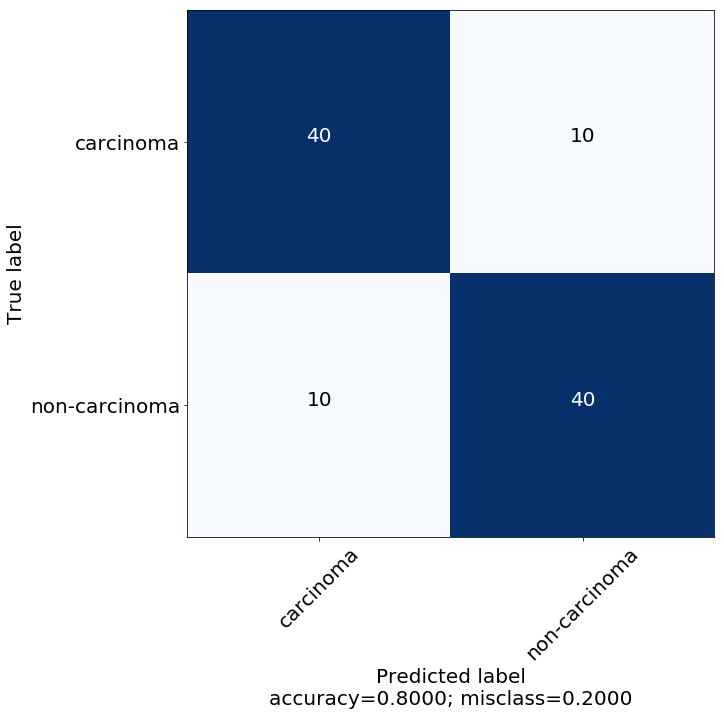

In [21]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

labels = []

label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

for k,v in indexlabel.items():
    labels.append(v)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.savefig('plots/3.InceptionV3-2-Private-DataSet-CM.png', bbox_inches='tight', dpi = 100) 


plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels, title=' ')

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred=predictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[40 10]
 [10 40]]
               precision    recall  f1-score   support

    carcinoma       0.80      0.80      0.80        50
non-carcinoma       0.80      0.80      0.80        50

  avg / total       0.80      0.80      0.80       100



In [23]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  80.0
Specificity :  80.0


In [24]:
print('roc_auc_score = ' + str(roc_auc_score(predictions, y_true)))

roc_auc_score = 0.8


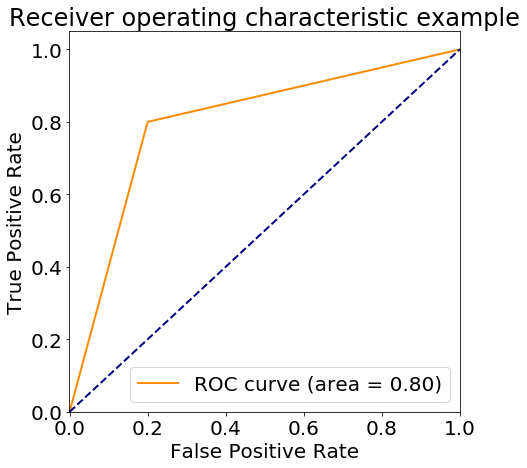

In [25]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
predict = model.predict_proba(test_data, batch_size=batch_size, verbose=1)

100/100 [==============================] - 0s 0us/step


In [27]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y = label_binarize(test_labels, classes=[0, 1])
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [28]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

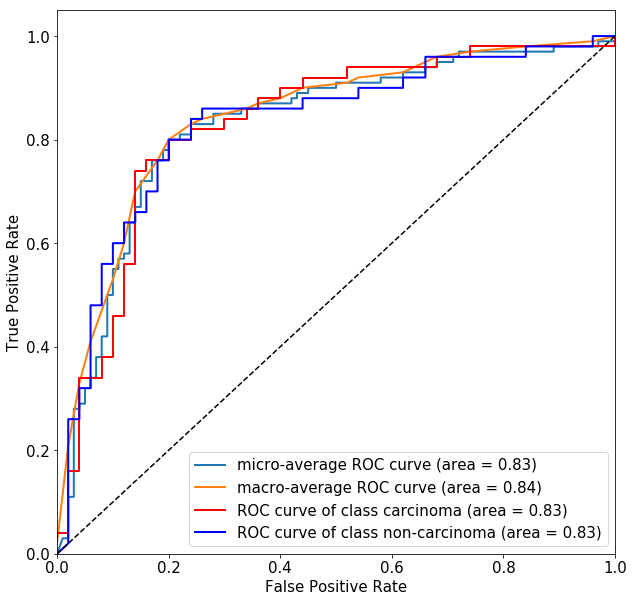

In [29]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from itertools import cycle
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
    

plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)
plot_name = 'no variation'
colors = cycle(['red','blue','green','yellow','orange', 'aqua', 'cornflowerblue'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classnames[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [30]:
tn, fp, fn, tp = cm.ravel()

In [31]:
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
tp: 40
fp: 10
tn: 40
fn: 10


In [32]:
print('F1 score:', f1_score(y_true, y_pred))

F1 score: 0.8000000000000002


In [33]:
recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

F1 score: 0.8


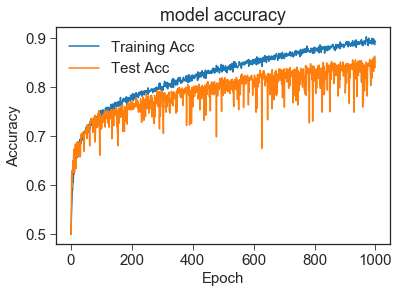

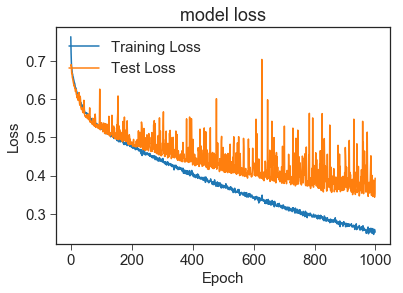

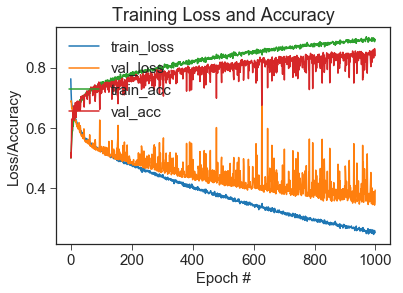

In [34]:
plt.style.use("seaborn-ticks")

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")